In [51]:
from sde import * 

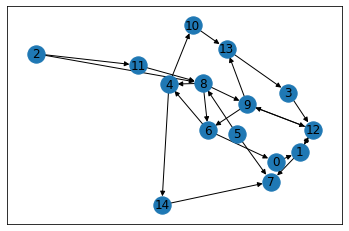

In [52]:
DG = makeDirectedGraph(15,27)
nx.draw_networkx(DG)

In [53]:
import operator

unsort_centDict = nx.degree_centrality(DG)    #get centrality values for each node in the graph 
centDict = dict(sorted(unsort_centDict.items(), key=operator.itemgetter(1),reverse=True))
print(centDict)

{8: 0.42857142857142855, 9: 0.3571428571428571, 12: 0.3571428571428571, 1: 0.2857142857142857, 4: 0.2857142857142857, 6: 0.2857142857142857, 7: 0.21428571428571427, 13: 0.21428571428571427, 0: 0.14285714285714285, 2: 0.14285714285714285, 3: 0.14285714285714285, 5: 0.14285714285714285, 10: 0.14285714285714285, 11: 0.14285714285714285, 14: 0.14285714285714285}


In [59]:
def getHighestCentralityNodes(dg):
    nx.degree_centrality(dg)   #returns dict with items {node:centrality}
    highest_cent_nodes = []   #initiate list for highest centrality nodes
    centMax = max(centDict.values())    #find highest centrality in the graph

    highest_cent_nodes = [key_node for key_node in centDict if (centDict.get(key_node) == centMax)]  #list of nodes with highest key node value
    
    #if there is a singular highest centrality node, then add the second highest node(s) to the list
    while (len(highest_cent_nodes) < 2): 
        centDict2 = {key:val for key, val in centDict.items() if val != centMax}
        centMax2 = max(centDict2.values())
        secHighestNodes = [key_node for key_node in centDict2 if (centDict2.get(key_node) == centMax2)]
        highest_cent_nodes += secHighestNodes
        
    return highest_cent_nodes

getHighestCentralityNodes(DG)

[8, 9, 12]

In [60]:
import itertools

# split list of highest cent nodes into all possible subsets size 2
HNCchoose2 = list(itertools.combinations(getHighestCentralityNodes(DG), 2))
print(HNCchoose2)

[(8, 9), (8, 12), (9, 12)]


# Similiarity method: Jaccard Index

In [61]:
#calculate Jaccard Index for each pair of highest centrality nodes
for pair in HNCchoose2:
    child0 = get_all_children(DG, pair[0], {})
    child1 = get_all_children(DG, pair[1], {})
    Jindex = calculate_similarity(DG, pair[0], pair[1])
    print(pair, Jindex)

RecursionError: maximum recursion depth exceeded

# Similarity method: Edit-distance

Edit-distance similarity implementation based only on a node's children.

In [62]:
for pair in HNCchoose2:
    print(pair, get_immediate_similarity(DG, pair[0], pair[1]))
    print(pair[0], find_most_immediate_similar(DG, pair[0]))
    print(pair[1], find_most_immediate_similar(DG, pair[1]), '\n')

(8, 9) 0.9012937525991928
8 6
9 1 

(8, 12) 0.7950412124287309
8 6
12 8 

(9, 12) 1.0
9 1
12 8 



Edit-distance similarity implementation based only on a node's descendants.

In [63]:
for pair in HNCchoose2:
    print(pair, get_full_similarity(DG, pair[0], pair[1]))
    print(pair[0], find_most_similar(DG, pair[0]))
    print(pair[1], find_most_similar(DG, pair[1]), '\n')

RecursionError: maximum recursion depth exceeded

# Similarity method: Simrank (Networkx)

In [64]:
for pair in HNCchoose2: 
    simrank = nx.algorithms.similarity.simrank_similarity(DG, source=pair[0], target=pair[1])
    print(pair,  simrank)

(8, 9) 0.1917824355885327
(8, 12) 0.250557379356348
(9, 12) 0.10204036262398057
